# Wizualizacje

In [62]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets
import matplotlib.ticker as ticker
import seaborn as sns

In [63]:
data = pd.read_csv("data.csv", encoding="latin1")

data = data.rename(columns={
    "ï»¿Kraj": "Kraj"
})

In [64]:
clean_data = pd.read_csv("clean_data.csv", encoding="latin1")

clean_data = clean_data.rename(columns={
    "ï»¿Kraj": "Kraj"
})

In [65]:
# zmienne kategoryczne
categorical_vars = ['Kraj', 'Kontynent']

# zmienne czasowe (opcjonalnie osobno)
time_var = ['Rok']

# zmienne ilościowe
quantitative_vars = [
    'Stopa_bezrobocia', 'Edukacja', 'Dlugosc_zycia', 'Zdrowie',
    'Inflacja', 'Gini', 'Wspolczynnik_urbanizacji', 'Skolaryzacja',
    'Rolnictwo', 'Dzieci_0-14', 'p0p50', 'p90p100', 'p99p100',
    'PKB_pc', 'Indeks_nierow'
]


In [67]:
clean_data['Gini'] = clean_data['Gini']/100

In [69]:
desc_stats = clean_data[quantitative_vars].describe().T

# dodanie mediany (describe jej nie pokazuje osobno)
desc_stats['median'] = clean_data[quantitative_vars].median()

# zmiana kolejności kolumn
desc_stats = desc_stats[
    ['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']
]

desc_stats


,mean,median,std,min,25%,50%,75%,max
Stopa_bezrobocia,7.977646,6.700000,5.253447,0.140000,4.421000,6.700000,10.233500,37.320000
Edukacja,4.557749,4.511018,1.538231,0.348517,3.524070,4.511018,5.427960,14.519741
Dlugosc_zycia,72.859248,74.176829,7.628664,36.720000,69.512317,74.176829,78.164024,84.560000
Zdrowie,7.150165,7.092077,2.546200,1.717741,5.238285,7.092077,8.873386,18.813253
Inflacja,16.505128,3.708333,138.115666,-4.475618,1.812952,3.708333,8.097766,4734.914347
Gini,0.374390,0.355000,0.087156,0.202000,0.309000,0.355000,0.426500,0.711000
Wspolczynnik_urbanizacji,63.715022,67.104743,19.017195,6.648805,53.419803,67.104743,77.713399,100.000000
Skolaryzacja,101.393502,101.366188,11.966809,25.565756,98.318703,101.366188,106.057890,155.315789
Rolnictwo,8.797770,5.751716,9.034842,0.187252,2.231627,5.751716,11.693351,65.598150
Dzieci_0-14,25.172261,21.488883,9.991510,11.799989,16.872907,21.488883,32.161721,50.127532


In [70]:
categorical_summary = pd.DataFrame({
    'liczba_obserwacji': clean_data[categorical_vars].count(),
    'liczba_kategorii': clean_data[categorical_vars].nunique()
})

categorical_summary

,liczba_obserwacji,liczba_kategorii
Kraj,2347,168
Kontynent,2347,6


In [71]:
continent_freq = clean_data['Kontynent'].value_counts()
continent_freq

Kontynent
Europe           1007
Asia              438
North America     321
South America     281
Africa            263
Oceania            37
Name: count, dtype: int64

In [72]:
panel_info = {
    'Liczba krajów': clean_data['Kraj'].nunique(),
    'Liczba lat': clean_data['Rok'].nunique(),
    'Liczba obserwacji': len(clean_data),
    'Zakres lat': (clean_data['Rok'].min(), clean_data['Rok'].max())
}

panel_info


{'Liczba krajów': 168,
 'Liczba lat': 62,
 'Liczba obserwacji': 2347,
 'Zakres lat': (np.int64(1963), np.int64(2024))}

In [73]:
desc_stats.to_latex('statystyki_opisowe.tex', float_format="%.3f")

In [74]:
clean_data[(clean_data['Kraj'] == 'United Kingdom') & (clean_data['Rok'] > 2000)].head(10)

,Kraj,Rok,Stopa_bezrobocia,Edukacja,Dlugosc_zycia,Zdrowie,Inflacja,Gini,Wspolczynnik_urbanizacji,Skolaryzacja,Rolnictwo,Dzieci_0-14,p0p50,p90p100,p99p100,PKB_pc,Indeks_nierow,Kontynent
2181,United Kingdom,2001,4.696,4.10014,77.992683,7.452114,1.532350,0.371,79.983830,100.935921,0.758425,18.681081,0.1987,0.3570,0.1144,45376.1778,0.575742,Europe
2182,United Kingdom,2002,5.037,4.61193,78.143902,7.878473,1.520402,0.351,80.114606,100.692200,0.899764,18.493239,0.1971,0.3603,0.1182,45908.7477,0.599696,Europe
2183,United Kingdom,2003,4.807,4.80129,78.446341,8.078313,1.376500,0.349,80.233159,100.598129,0.831207,18.420760,0.1932,0.3723,0.1293,47062.8296,0.669255,Europe
2184,United Kingdom,2004,4.594,4.73555,78.746341,8.338676,1.390398,0.348,80.342328,105.938087,0.741442,18.343039,0.1979,0.3662,0.1276,47843.2369,0.644770,Europe
2185,United Kingdom,2005,4.835,4.92977,79.048780,8.394309,2.089136,0.355,80.445594,105.804703,0.547159,18.177974,0.1941,0.3781,0.1406,48683.2668,0.724369,Europe
2186,United Kingdom,2006,5.411,4.97649,79.248780,8.545225,2.455662,0.359,80.546435,104.354080,0.575070,18.018985,0.1910,0.3821,0.1447,49357.3176,0.757592,Europe
2187,United Kingdom,2007,5.342,4.92445,79.448780,8.757114,2.386562,0.344,80.648333,103.104927,0.553318,17.894697,0.1964,0.3815,0.1445,50188.6894,0.735743,Europe
2188,United Kingdom,2008,5.705,4.90974,79.600000,9.040338,3.521409,0.354,80.754767,105.741898,0.669822,17.823420,0.1955,0.3664,0.1390,49685.6357,0.710997,Europe
2189,United Kingdom,2009,7.627,5.06263,80.051220,9.847713,1.961732,0.351,80.869218,105.421211,0.680901,17.787350,0.1836,0.3831,0.1414,47032.8215,0.770153,Europe
2190,United Kingdom,2010,7.924,5.69868,80.402439,9.789379,2.492655,0.337,80.995165,105.673241,0.565712,17.758554,0.2066,0.3445,0.1216,47647.1512,0.588577,Europe


In [75]:
continent_pl = {
    "Europe": "Europa",
    "Africa": "Afryka",
    "South America": "Ameryka Południowa",
    "Asia": "Azja",
    "North America": "Ameryka Północna",
    "Oceania": "Oceania"
}

clean_data["Kontynent_PL"] = clean_data["Kontynent"].replace(continent_pl)

In [76]:
selected_countries = ['USA', 'Indonesia', 'Russian Federation', 'Brazil', 'United Kingdom']
selected_countries_pl = ['Stany Zjednoczone', 'Indonezja', 'Rosja', 'Brazylia', 'Wielka Brytania']

filtered_df = clean_data[
    (clean_data['Kraj'].isin(selected_countries)) &
    (clean_data['Rok'] > 2000)
]

country_pl = {
    "Brazil": "Brazylia",
    "Indonesia": "Indonezja",
    "Russian Federation": "Rosja",
    "USA": "Stany Zjednoczone",
    "United Kingdom": "Wielka Brytania"
}

filtered_df["Kraj_PL"] = filtered_df["Kraj"].replace(country_pl)

C:\Users\hnowa\AppData\Local\Temp\ipykernel_23988\3550348763.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Kraj_PL"] = filtered_df["Kraj"].replace(country_pl)


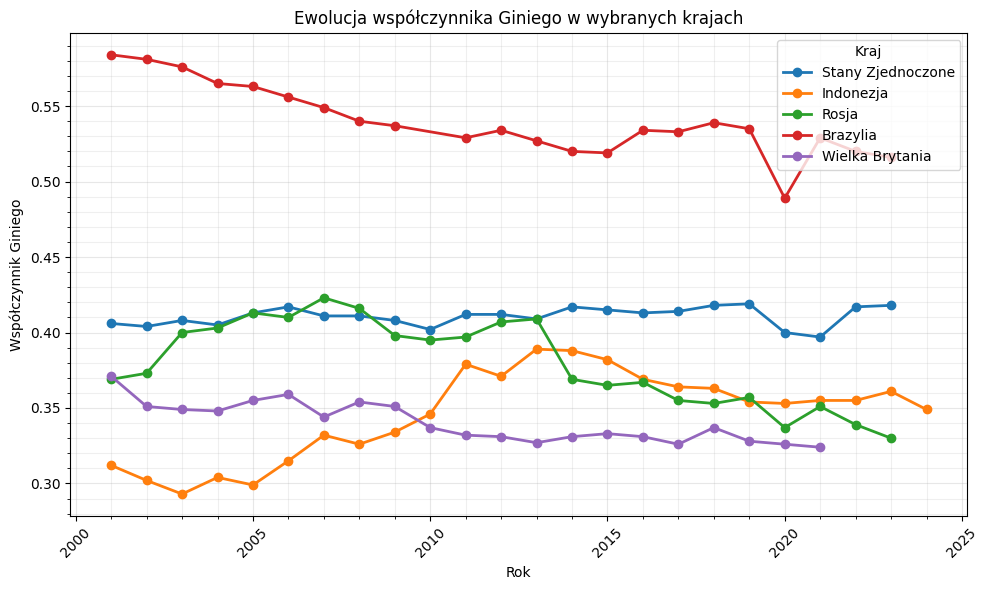

In [77]:
# Tworzymy wykres
plt.figure(figsize=(10, 6))

# Wersja z matplotlib
for country in selected_countries_pl:
    country_data = filtered_df[filtered_df['Kraj_PL'] == country]
    plt.plot(country_data['Rok'], country_data['Gini'], 
             marker='o', linewidth=2, label=country, markersize=6)

plt.xlabel('Rok')
plt.ylabel('Współczynnik Giniego')
plt.title('Ewolucja współczynnika Giniego w wybranych krajach')
plt.legend(title='Kraj', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Dodanie siatki pomocniczej
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)

plt.tight_layout()
plt.show()

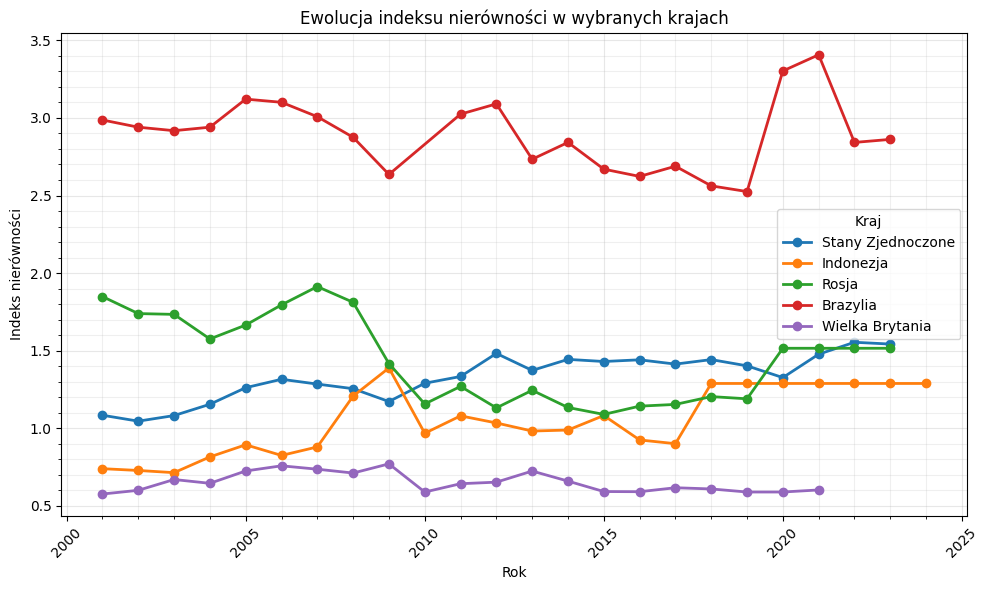

In [78]:
# Tworzymy wykres
plt.figure(figsize=(10, 6))

# Wersja z matplotlib
for country in selected_countries_pl:
    country_data = filtered_df[filtered_df['Kraj_PL'] == country]
    plt.plot(country_data['Rok'], country_data['Indeks_nierow'], 
             marker='o', linewidth=2, label=country, markersize=6)

plt.xlabel('Rok')
plt.ylabel('Indeks nierówności')
plt.title('Ewolucja indeksu nierówności w wybranych krajach')
plt.legend(title='Kraj', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Dodanie siatki pomocniczej
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)

plt.tight_layout()
plt.show()

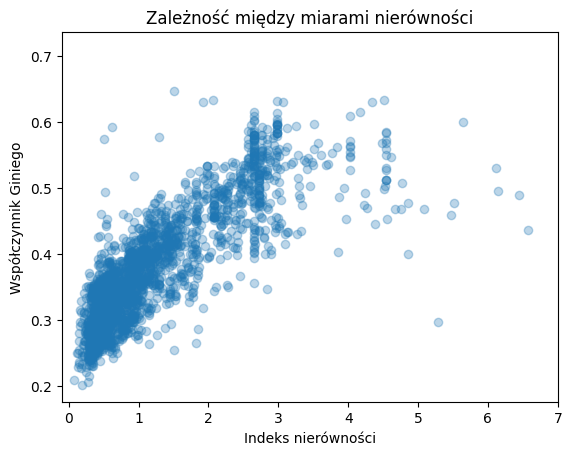

               Indeks_nierow      Gini
Indeks_nierow       1.000000  0.813775
Gini                0.813775  1.000000


In [79]:
plt.scatter(clean_data['Indeks_nierow'], clean_data['Gini'], alpha=0.3)
plt.xlabel('Indeks nierówności')
plt.xlim(-0.1, 7)
plt.ylabel('Współczynnik Giniego')
plt.title('Zależność między miarami nierówności')
plt.show()

corr = clean_data[['Indeks_nierow', 'Gini']].corr()
print(corr)

In [80]:
g20_countries = [
    "Argentina",
    "Australia",
    "Brazil",
    "China",
    "France",
    "India",
    "Indonesia",
    "Japan",
    "Canada",
    "Mexico",
    "Germany",
    "South Africa",
    "Saudi Arabia",
    "Russian Federation",
    "USA",
    "Turkey",
    "United Kingdom",
    "Italy",
    "Korea"
]

g20_data = clean_data[
    (clean_data['Kraj'].isin(g20_countries))
]

country_pl = {
    "Argentina": "Argentyna",
    "Australia": "Australia",
    "Brazil": "Brazylia",
    "China": "Chiny",
    "France": "Francja",
    "India": "Indie",
    "Indonesia": "Indonezja",
    "Japan": "Japonia",
    "Canada": "Kanada",
    "Mexico": "Meksyk",
    "Germany": "Niemcy",
    "South Africa": "RPA",
    "Saudi Arabia": "Arabia Saudyjska",
    "Russian Federation": "Rosja",
    "USA": "Stany Zjednoczone",
    "Turkey": "Turcja",
    "United Kingdom": "Wielka Brytania",
    "Italy": "Włochy",
    "Korea": "Korea Południowa"
}

g20_data["Kraj_PL"] = g20_data["Kraj"].replace(country_pl)


C:\Users\hnowa\AppData\Local\Temp\ipykernel_23988\4259299178.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g20_data["Kraj_PL"] = g20_data["Kraj"].replace(country_pl)


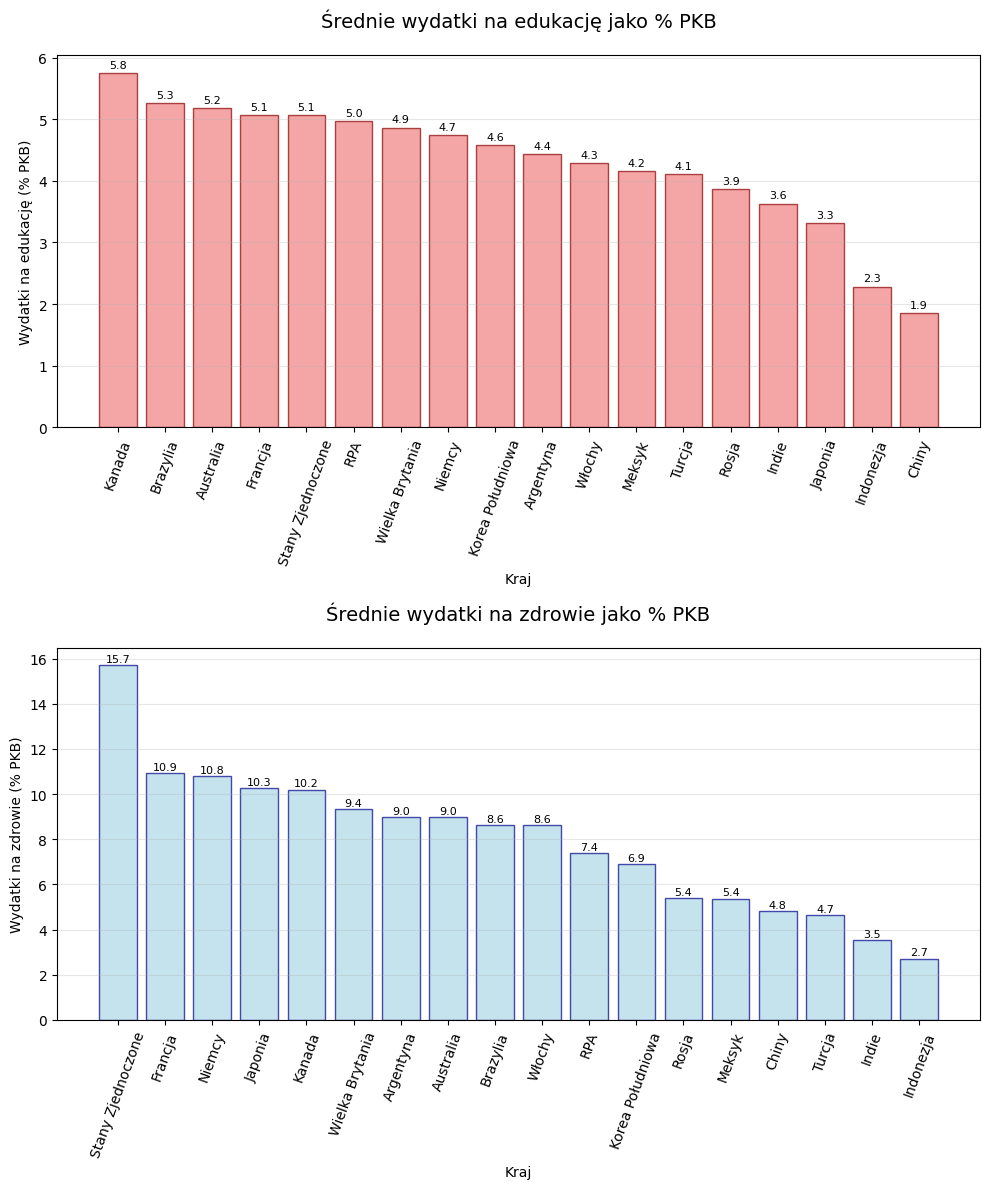

In [81]:
education_by_country = g20_data.groupby('Kraj_PL')['Edukacja'].mean().sort_values(ascending=False)
health_by_country = g20_data.groupby('Kraj_PL')['Zdrowie'].mean().sort_values(ascending=False)

# Tworzenie figury z 2 subplotami obok siebie
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Pierwszy wykres - edukacja
bars1 = ax1.bar(education_by_country.index, education_by_country.values, 
                color='lightcoral', edgecolor='darkred', alpha=0.7)
ax1.set_xlabel('Kraj')
ax1.set_ylabel('Wydatki na edukację (% PKB)')
ax1.set_title('Średnie wydatki na edukację jako % PKB', fontsize=14, pad=20)
ax1.tick_params(axis='x', rotation=70)
ax1.grid(axis='y', alpha=0.3)

# Drugi wykres - zdrowie
bars2 = ax2.bar(health_by_country.index, health_by_country.values, 
                color='lightblue', edgecolor='darkblue', alpha=0.7)
ax2.set_xlabel('Kraj')
ax2.set_ylabel('Wydatki na zdrowie (% PKB)')
ax2.set_title('Średnie wydatki na zdrowie jako % PKB', fontsize=14, pad=20)
ax2.tick_params(axis='x', rotation=70)
ax2.grid(axis='y', alpha=0.3)

# Dodanie wartości na słupkach
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\hnowa\AppData\Local\Temp\ipykernel_23988\1896164079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g20_data['middle_40'] = 1 - g20_data['p0p50'] - g20_data['p90p100']


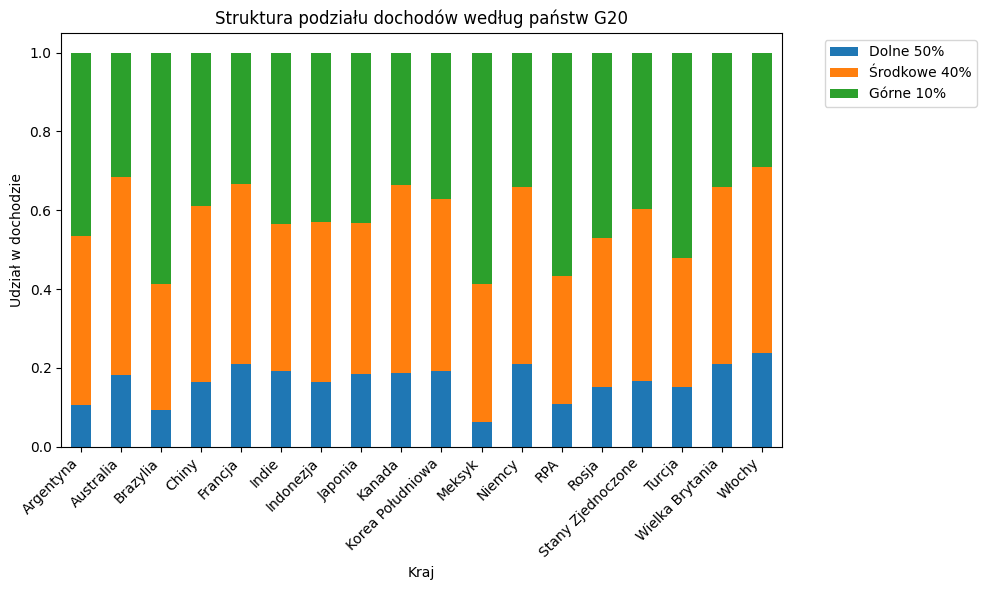

In [82]:
g20_data['middle_40'] = 1 - g20_data['p0p50'] - g20_data['p90p100']

grouped = g20_data.groupby('Kraj_PL')[['p0p50', 'middle_40', 'p90p100']].mean()

grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.ylabel('Udział w dochodzie')
plt.xlabel('Kraj')
plt.title('Struktura podziału dochodów według państw G20')
plt.legend(
    ['Dolne 50%', 'Środkowe 40%', 'Górne 10%'],
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


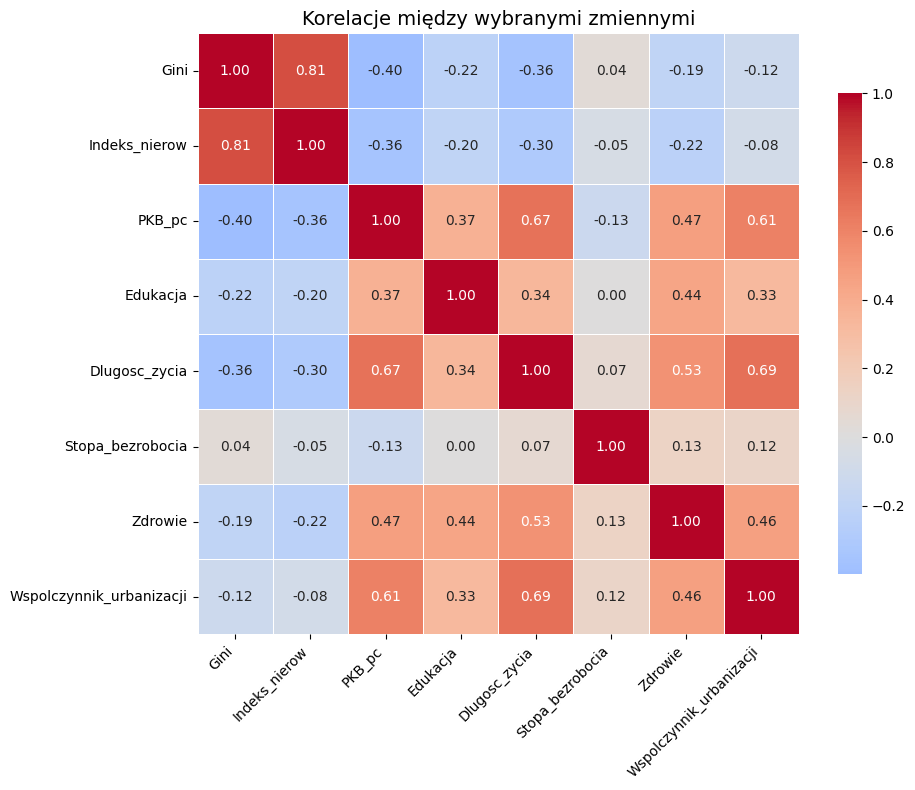

In [83]:
vars = ['Gini', 'Indeks_nierow', 'PKB_pc',
        'Edukacja', 'Dlugosc_zycia', 'Stopa_bezrobocia',
        'Zdrowie', 'Wspolczynnik_urbanizacji']

plt.figure(figsize=(10, 8))

corr = clean_data[vars].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,                 # symetria wokół 0
    square=True,              # równe kafelki
    linewidths=0.5,           # linie między komórkami
    linecolor='white',
    cbar_kws={'shrink': 0.8}  # mniejszy pasek kolorów
)

plt.title('Korelacje między wybranymi zmiennymi', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [84]:
df = clean_data.copy()
df = df.drop(columns=['Kontynent'])
df = df.rename(columns={'Kontynent_PL': 'Kontynent',
                        'Zdrowie': 'Wydatki na zdrowie (%PKB)',
                        'PKB_pc': 'PKB per capita'})

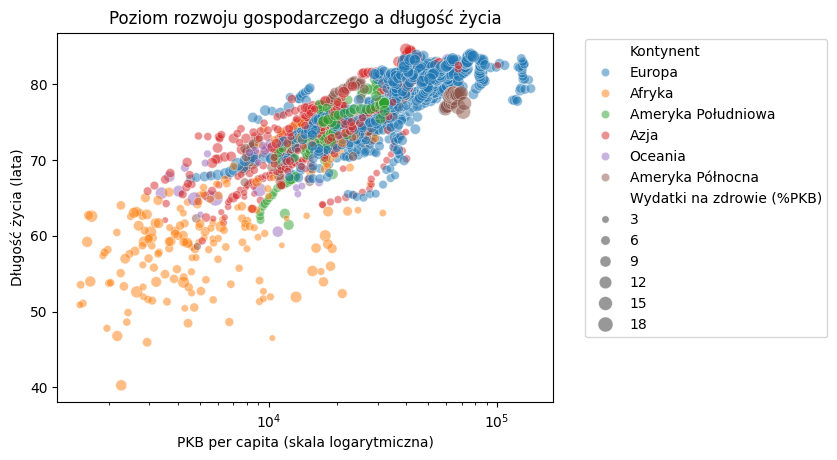

In [85]:
ax = sns.scatterplot(
    data=df,
    x='PKB per capita',
    y='Dlugosc_zycia',
    hue='Kontynent',
    size='Wydatki na zdrowie (%PKB)',
    sizes = (20, 120),
    alpha=0.5
)

plt.xscale('log')
plt.xlabel('PKB per capita (skala logarytmiczna)')
plt.ylabel('Długość życia (lata)')
plt.title('Poziom rozwoju gospodarczego a długość życia')

# zmiana tytułów legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=labels,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.show()


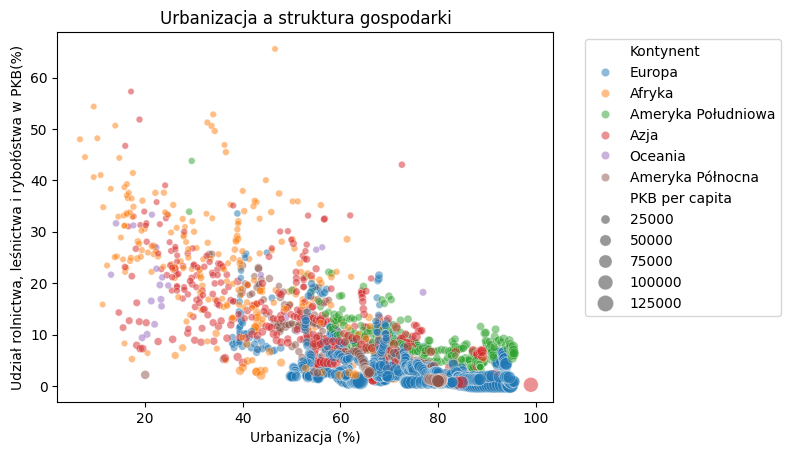

In [86]:
ax = sns.scatterplot(
    data=df,
    x='Wspolczynnik_urbanizacji',
    y='Rolnictwo',
    hue='Kontynent',
    size = 'PKB per capita',
    sizes = (20, 150),
    alpha=0.5
)
plt.xlabel('Urbanizacja (%)')
plt.ylabel('Udział rolnictwa, leśnictwa i rybołóstwa w PKB(%)')
plt.title('Urbanizacja a struktura gospodarki')


# zmiana tytułów legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=labels,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.show()


C:\Users\hnowa\AppData\Local\Temp\ipykernel_23988\788330663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


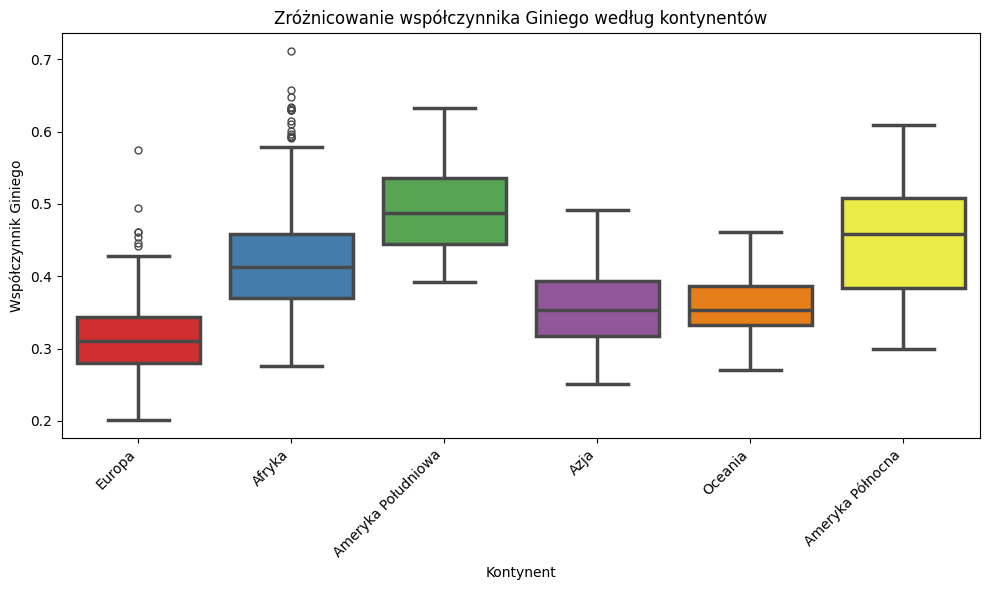

In [87]:
# Ustawienie stylu i rozmiaru wykresu
plt.figure(figsize=(10, 6))

# Tworzenie boxplota z dodatkowymi parametrami
ax = sns.boxplot(
    data=clean_data,
    x='Kontynent_PL',
    y='Gini',
    palette="Set1",
    linewidth=2.5,
    fliersize=5,
    saturation=0.8
)

# Tytuł i etykiety osi
plt.title('Zróżnicowanie współczynnika Giniego według kontynentów')
plt.xlabel('Kontynent')
plt.ylabel('Współczynnik Giniego')

# Rotacja etykiet osi X jeśli są długie
plt.xticks(rotation=45, ha='right')


# Dostosowanie odstępów
plt.tight_layout()

plt.show()


C:\Users\hnowa\AppData\Local\Temp\ipykernel_23988\2618940574.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


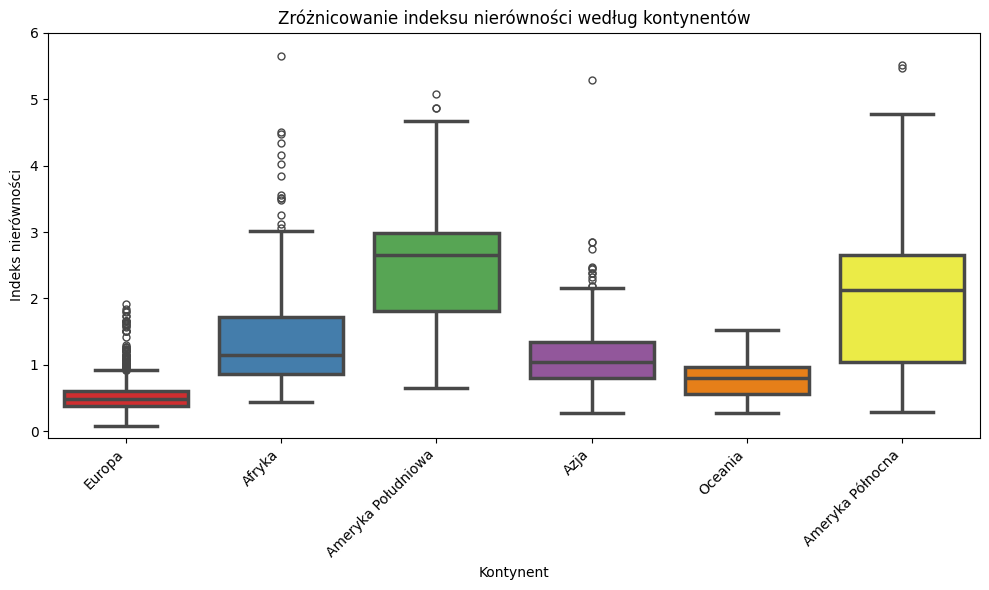

In [88]:
# Ustawienie stylu i rozmiaru wykresu
plt.figure(figsize=(10, 6))

# Tworzenie boxplota z dodatkowymi parametrami
ax = sns.boxplot(
    data=clean_data,
    x='Kontynent_PL',
    y='Indeks_nierow',
    palette="Set1",
    linewidth=2.5,
    fliersize=5,
    saturation=0.8
)

# Tytuł i etykiety osi
plt.title('Zróżnicowanie indeksu nierówności według kontynentów')
plt.ylim(-0.1, 6)
plt.xlabel('Kontynent')
plt.ylabel('Indeks nierówności')

# Rotacja etykiet osi X jeśli są długie
plt.xticks(rotation=45, ha='right')


# Dostosowanie odstępów
plt.tight_layout()

plt.show()


In [89]:
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

In [90]:
gini_map = (
    clean_data[clean_data["Rok"] >= 2000]
    .groupby("Kraj")
    .agg(
        Gini=("Gini", "mean"),
        Indeks_nierow=("Indeks_nierow", "mean")
    )
    .reset_index()
)

country_map = {
    "Bahamas": "The Bahamas",
    "Cote dâ\x80\x99Ivoire": "Ivory Coast",
    "Czech Republic": "Czechia",
    "Brunei Darussalam": "Brunei",
    "DR Congo": "Democratic Republic of the Congo",
    "Timor-Leste": "East Timor",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "Serbia": "Republic of Serbia",
    "Korea": "South Korea",
    "Congo": "Republic of the Congo",
    "Syrian Arab Republic": "Syria",
    "Tanzania": "United Republic of Tanzania",
    "Viet Nam": "Vietnam",
    "USA": "United States of America",
    "Eswatini": "eSwatini",
    "Russian Federation": "Russia"

}
gini_map["Kraj"] = gini_map["Kraj"].replace(country_map)

In [91]:
world_gini = world.merge(
    gini_map,
    left_on="SOVEREIGNT",
    right_on="Kraj",
    how="left"
)

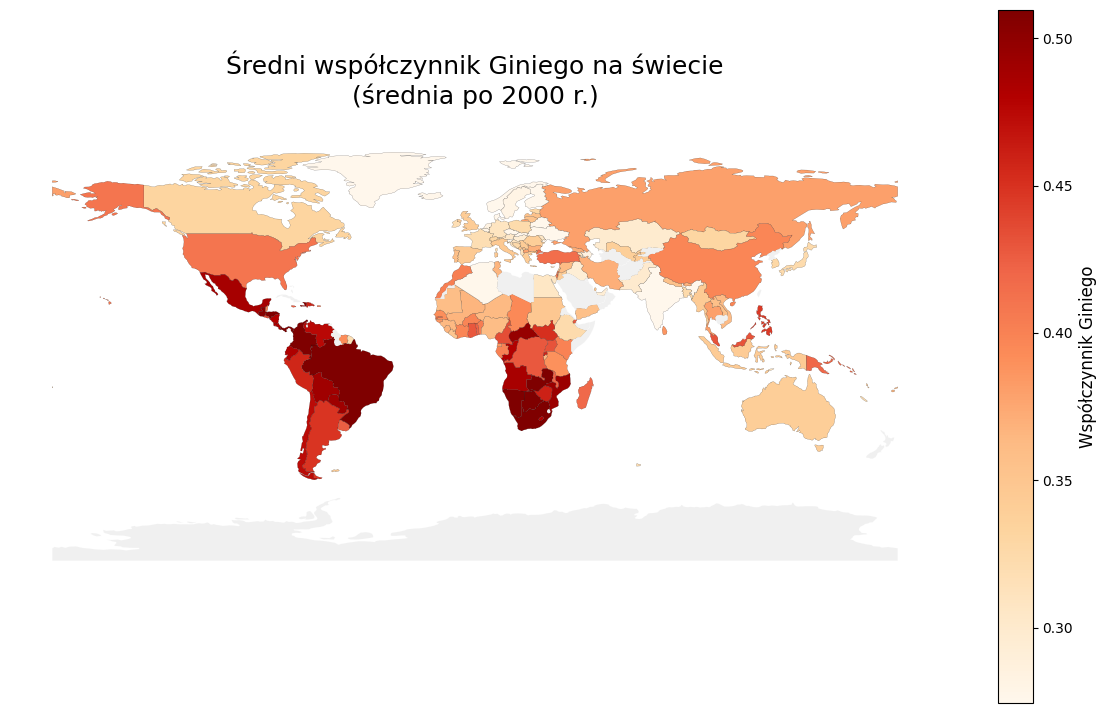

In [96]:
fig, ax = plt.subplots(figsize=(15, 9))

# Normalizacja – lepszy kontrast
norm = mpl.colors.Normalize(
    vmin=world_gini["Gini"].quantile(0.05),
    vmax=world_gini["Gini"].quantile(0.95)
)

world_gini.plot(
    column="Gini",
    cmap="OrRd",
    linewidth=0.1,
    edgecolor="black",
    ax=ax,
    legend=True,
    norm=norm,
    missing_kwds={
        "color": "#f0f0f0",
        "edgecolor": "white",
        "label": "Brak danych"
    }
)

# Tytuł + podtytuł
ax.set_title(
    "Średni współczynnik Giniego na świecie\n(średnia po 2000 r.)",
    fontsize=18,
    pad=20
)

ax.axis("off")

# Lepsza legenda
cbar = ax.get_figure().axes[-1]
cbar.set_ylabel("Współczynnik Giniego", fontsize=12)

plt.show()


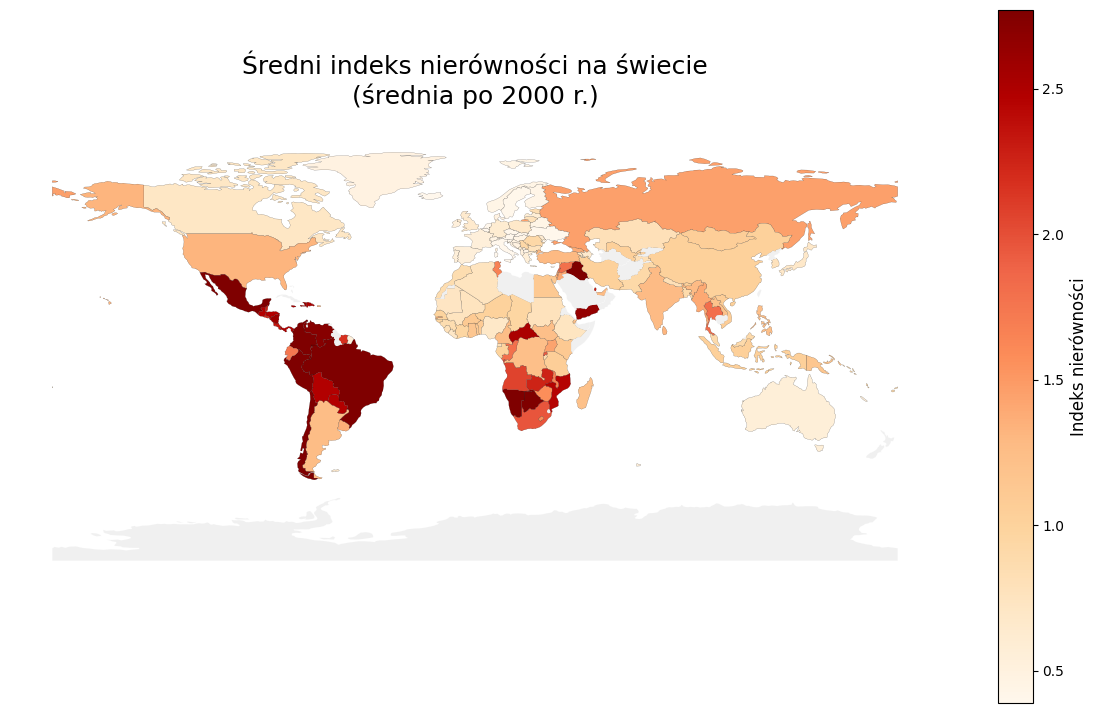

In [93]:
fig, ax = plt.subplots(figsize=(15, 9))

# Normalizacja – lepszy kontrast
norm = mpl.colors.Normalize(
    vmin=world_gini["Indeks_nierow"].quantile(0.05),
    vmax=world_gini["Indeks_nierow"].quantile(0.95)
)

world_gini.plot(
    column="Indeks_nierow",
    cmap="OrRd",
    linewidth=0.1,
    edgecolor="black",
    ax=ax,
    legend=True,
    norm=norm,
    missing_kwds={
        "color": "#f0f0f0",
        "edgecolor": "white",
        "label": "Brak danych"
    }
)

# Tytuł + podtytuł
ax.set_title(
    "Średni indeks nierówności na świecie\n(średnia po 2000 r.)",
    fontsize=18,
    pad=20
)

ax.axis("off")

# Lepsza legenda
cbar = ax.get_figure().axes[-1]
cbar.set_ylabel("Indeks nierówności", fontsize=12)

plt.show()
